# China Eastern Airlines Flight 5735

#### Load Python tools

In [1]:
%load_ext lab_black

In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

In [4]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

## Read [data](https://www.flightradar24.com/data/aircraft/b-1791) from Flightradar24

In [8]:
src = pd.read_csv("../data/raw/MU5864_2b36429e.csv")

In [9]:
src.columns = src.columns.str.lower()

In [10]:
src["date"] = pd.to_datetime(src["utc"]).dt.date
src["time"] = pd.to_datetime(src["utc"]).dt.time

In [11]:
src[["latitude", "longitude"]] = src["position"].str.split(",", expand=True)

In [12]:
src = src[
    [
        "date",
        "time",
        "timestamp",
        "altitude",
        "speed",
        "direction",
        "latitude",
        "longitude",
    ]
].sort_values("time")

In [13]:
src.head(10)

,date,time,timestamp,altitude,speed,direction,latitude,longitude
0,2022-03-21,02:10:42,1647828642,2025,157,17,29.745804,106.672333
1,2022-03-21,02:10:48,1647828648,2225,161,17,29.750061,106.673866
2,2022-03-21,02:10:54,1647828654,2425,165,19,29.754364,106.675552
3,2022-03-21,02:10:57,1647828657,2550,166,23,29.756378,106.676506
4,2022-03-21,02:11:00,1647828660,2650,166,26,29.758425,106.677734
5,2022-03-21,02:11:03,1647828663,2775,167,30,29.760406,106.679092
6,2022-03-21,02:11:09,1647828669,3025,168,36,29.764206,106.682213
7,2022-03-21,02:11:12,1647828672,3150,169,39,29.7659,106.683792
8,2022-03-21,02:11:16,1647828676,3275,169,40,29.76828,106.686172
9,2022-03-21,02:11:18,1647828678,3400,169,40,29.769928,106.687813


In [14]:
src.tail(10)

,date,time,timestamp,altitude,speed,direction,latitude,longitude
98,2022-03-21,02:25:03,1647829503,25600,429,177,28.945158,106.908333
99,2022-03-21,02:26:05,1647829565,25600,430,177,28.821886,106.914581
100,2022-03-21,02:27:06,1647829626,25600,427,177,28.701645,106.920372
101,2022-03-21,02:28:04,1647829684,25600,424,177,28.586563,106.926971
102,2022-03-21,02:31:45,1647829905,25600,393,248,28.205721,106.841499
103,2022-03-21,02:34:34,1647830074,25600,399,249,28.096069,106.511238
104,2022-03-21,02:35:35,1647830135,25600,400,249,28.056196,106.390846
105,2022-03-21,02:36:37,1647830197,25600,400,249,28.015411,106.268326
106,2022-03-21,02:37:39,1647830259,25600,400,249,27.975428,106.148178
107,2022-03-21,02:47:33,1647830853,25600,405,224,27.546021,105.01976


In [15]:
geo_df = gpd.GeoDataFrame(
    src, geometry=gpd.points_from_xy(src["longitude"], src["latitude"])
)

In [16]:
geo_df["flight"] = "China Eastern Airlines Flight 5735"

In [17]:
geo_df["date"] = geo_df["date"].astype(str)

In [18]:
lines = (
    geo_df.groupby(["date", "flight"])["geometry"]
    .apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
    .reset_index()
)

<AxesSubplot:>

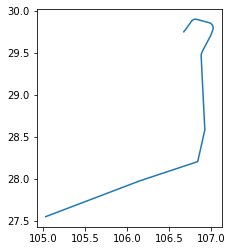

In [19]:
lines.plot()

## Export 

In [20]:
src.to_csv("../../usc/data/geo/china-eastern-crash-points.csv", index=False)
lines.to_file("../../usc/data/geo/china-eastern-crash-lines.geojson", driver="GeoJSON")